In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement/placement.csv


steps

1.Precprocesses+EDA+ Feature Selection

2.Extract input and output values

3.Scale the values

4.Train Test split

5.Traint the model

6.Evaluate the model

7.Deploy the model

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/kaggle/input/placement/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [9]:
df=df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


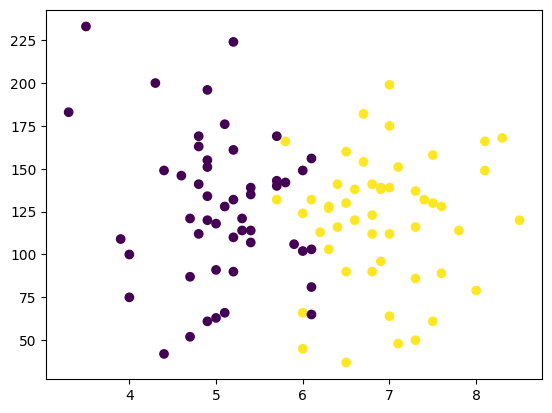

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [14]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y.shape

(100,)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [18]:
x_train

,cgpa,iq
45,6.0,66.0
90,7.3,86.0
35,6.8,90.0
69,8.5,120.0
36,5.7,140.0
...,...,...
32,7.0,139.0
46,5.3,114.0
33,6.0,149.0
25,5.0,91.0


In [19]:
y_test

76    0
82    1
48    1
9     0
14    0
74    1
37    1
51    0
97    1
30    1
Name: placement, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler= StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
x_train

array([[ 0.03893343, -1.45394552],
       [ 1.1777362 , -0.94724621],
       [ 0.73973513, -0.84590635],
       [ 2.22893875, -0.08585738],
       [-0.22386721,  0.42084193],
       [ 0.56453471, -0.08585738],
       [ 0.12653364,  0.82620137],
       [-0.92466891,  1.83959999],
       [-0.04866678, -0.4405469 ],
       [-1.09986934, -0.92191124],
       [ 0.38933428, -0.18719724],
       [ 1.61573726, -0.23786718],
       [ 1.79093769, -1.12459097],
       [ 0.30173407,  0.09148738],
       [-2.15107189,  2.77699372],
       [ 0.82733534,  0.39550696],
       [ 0.82733534,  0.370172  ],
       [ 0.91493556, -0.28853711],
       [ 0.91493556,  1.91560489],
       [ 1.1777362 ,  0.34483703],
       [ 0.73973513, -0.28853711],
       [-0.66186828,  0.2181622 ],
       [-1.45027019,  1.94093986],
       [ 0.47693449,  0.16749227],
       [ 0.91493556, -1.50461545],
       [ 0.03893343,  0.01548248],
       [ 0.12653364, -1.47928048],
       [ 1.1777362 , -0.18719724],
       [ 0.47693449,

In [24]:
x_test= scaler.transform(x_test)

In [25]:
x_test

array([[-0.92466891,  0.80086641],
       [ 0.47693449, -2.18865952],
       [ 0.56453471,  0.370172  ],
       [-0.74946849, -1.45394552],
       [ 0.12653364, -0.5165518 ],
       [ 0.65213492,  0.77553144],
       [ 1.8785379 ,  0.64885662],
       [-1.01226913,  0.44617689],
       [ 0.65213492,  1.48491048],
       [ 1.44053683,  0.11682234]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf=LogisticRegression()

In [29]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=clf.predict(x_test)

In [32]:
y_test

76    0
82    1
48    1
9     0
14    0
74    1
37    1
51    0
97    1
30    1
Name: placement, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.9

In [37]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

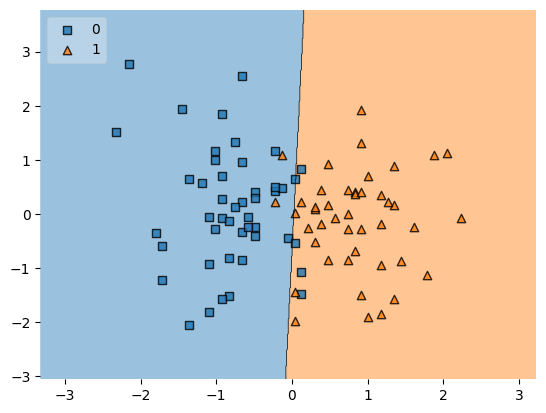

In [39]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))